<a href="https://colab.research.google.com/github/aarmentamna/machine_learning_advance/blob/main/TC4033_Activity3a_42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Maestría en Inteligencia Artificial Aplicada**
### **Curso: ADVANCED MACHINE LEARNING METHODS**
## Tecnológico de Monterrey
### Dr. José Antonio Cantoral Ceballos

## Activity Week 7
### **Exploring Word Embeddings with GloVe and Numpy.**

*TEAM MEMBERS:*

*   Roberto Romero Vielma - A00822314
*   José Javier Granados Hernández - A00556717
*   Aquiles Yonatan Armenta Hernandez - A01793252
*   Alan Avelino Fernández Juárez - A00989308

## TC 5033
### Word Embeddings

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



#### Import libraries


The code snippet imports various libraries and sets a specific style for plotting using matplotlib. Let's break down the purpose of each line:

1. Import the t-Distributed Stochastic Neighbor Embedding (t-SNE) algorithm from scikit-learn for dimensionality reduction.

2. Import the Principal Component Analysis (PCA) algorithm from scikit-learn for dimensionality reduction.

3. Import the matplotlib library to create plots and visualizations.

4. Import the NumPy library for numerical computations.

5. Import the 'norm' function from NumPy's linear algebra module for vector norm calculations.

6. Import the 'pickle' module for serializing and deserializing Python objects.

7. Set the style of the plots created with matplotlib to 'ggplot'.

In this code, these actions are performed at the beginning of a script or notebook to make these tools and configurations available for use throughout the code.


In [ ]:
# Import libraries
from sklearn.manifold import TSNE       # Import the t-Distributed Stochastic Neighbor Embedding (t-SNE) algorithm from scikit-learn for dimensionality reduction.
from sklearn.decomposition import PCA  # Import the Principal Component Analysis (PCA) algorithm from scikit-learn for dimensionality reduction.
import matplotlib.pyplot as plt        # Import the matplotlib library to create plots and visualizations.
import numpy as np                     # Import the NumPy library for numerical computations.
from numpy.linalg import norm         # Import the 'norm' function from NumPy's linear algebra module for vector norm calculations.
import pickle                          # Import the 'pickle' module for serializing and deserializing Python objects.
plt.style.use('ggplot')                # Set the style of the plots created with matplotlib to 'ggplot'.

#### Load file
In this section, we perform the following steps to download and configure GloVe word vectors:

1. **Download GloVe Word Vectors**: We start by downloading the GloVe word vectors in a 50-dimensional format from a specified URL using the `wget` command. This command retrieves the compressed GloVe word vectors file from the URL.

2. **Decompress the File**: After downloading, we use the `gunzip` command to decompress the GloVe word vectors file. This step is necessary to access the contents of the file.

3. **Define the File Path**: We define a variable named `PATH` and set it to the file path, which allows us to reference the GloVe word vectors file in our code.

4. **Set the Embedding Dimension**: We create a variable named `emb_dim` and set it to 50. This value represents the embedding dimension and indicates that each word will be represented as a 50-dimensional vector in the GloVe word vectors.


In [ ]:
# Download the GloVe word vectors in the 50-dimensional format from the specified URL
!wget https://github.com/uclnlp/inferbeddings/raw/master/data/glove/glove.6B.50d.txt.gz

zsh:1: command not found: wget


In [ ]:
# Alternative for macOS. Download the GloVe word vectors in the 50-dimensional format from the specified URL
!cURL https://github.com/uclnlp/inferbeddings/raw/master/data/glove/glove.6B.50d.txt.gz

In [ ]:
# Decompress the downloaded GloVe word vectors file using 'gunzip'.
!gunzip glove.6B.50d.txt.gz

gunzip: can't stat: glove.6B.50d.txt.gz (glove.6B.50d.txt.gz.gz): No such file or directory


In [ ]:
# Define the path to the GloVe word vectors file
PATH = 'glove.6B.50d.txt'

# Define the embedding dimension
emb_dim = 50

#### Using the `create_emb_dictionary` Function

The `create_emb_dictionary` function is designed to read GloVe word vectors from a file and create a dictionary that maps words to their corresponding word vectors. Here are the steps to use this function:

1. **Function Signature**:
   - To use the `create_emb_dictionary` function, you need to call it with one argument, which is the path to the GloVe word vectors file. The function will return a dictionary containing word embeddings.

2. **File Format**:
   - The function assumes that the provided file contains GloVe word vectors in text format. Each line in the file is expected to have the word followed by space-separated vector components.

3. **Function Execution**:
   - When you call the function with the path to the file, it initializes an empty dictionary, `emb_dictionary`, to store word embeddings.

   - It then opens the file for reading, processes each line, and splits it to extract the word and the corresponding vector components.

   - The word is stored as the key in the dictionary, and the vector components are converted into a NumPy array with a data type of `float32`. This array is associated with the word as its value in the dictionary.

   - This process continues for each line in the file until all words and their vectors are added to the dictionary.

4. **Returned Dictionary**:
   - The function returns the populated `emb_dictionary`, which contains words as keys and their corresponding word vectors as values.

In [ ]:
# Create dictionary with embeddings
def create_emb_dictionary(path):
    # Initialize an empty dictionary to store word embeddings.
    emb_dictionary = {}

    # Open the GloVe word vectors file specified by 'path' for reading.
    with open(path, 'r', encoding='utf-8') as file:
        # Iterate through each line in the file.
        for line in file:
            # Split the line into values, where the first value is the word, and the rest are the vector components.
            values = line.split()
            word = values[0]  # Extract the word from the line.

            # Convert the vector components to a NumPy array of float32 data type.
            vector = np.asarray(values[1:], dtype='float32')

            # Store the word and its corresponding vector in the dictionary.
            emb_dictionary[word] = vector

    # Return the populated word embedding dictionary.
    return emb_dictionary

In [ ]:
# create dictionary
embeddings_dict = create_emb_dictionary(PATH)

In [ ]:
# Serialize (Pickling)
# Save the 'embeddings_dict' dictionary to a binary file named 'embeddings_dict_50D.pkl'.
with open('embeddings_dict_50D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

# Deserialize (Unpickling)
# Load the pickled dictionary from the file 'embeddings_dict_50D.pkl'
with open('embeddings_dict_50D.pkl', 'rb') as f:
    embeddings_dict = pickle.load(f)

#### See some embeddings
The **show_n_first_words** function is designed to display the first 'n_words' lines from a file located at the specified 'path.' It accomplishes this task with the following steps:

1. **Function Purpose**:
The primary purpose of this function is to provide a way to inspect the content of a text file by printing the initial lines.
Opening the File:

2. **Opening the File**:
The function begins by opening the file specified by the 'path' argument. It opens the file in read mode ('r') for reading its content.
Iteration through Lines:

3. **Iteration through Lines**:
The function then iterates through the lines of the opened file using a for loop. For each line, it performs the following actions:

  * Splits the line into words:
  * Displays the line as a list of words.
  * Calculates and displays the count of word vector components (excluding the word itself).
4. **Display Limitation**:
  * The function allows you to limit the number of lines to be displayed using the 'n_words' parameter. It exits the loop when the specified limit is reached.

In [ ]:
# This function is used to display the first 'n_words' lines of the file located at the specified 'path'.
def show_n_first_words(path, n_words):
    # Open the file specified by 'path' for reading.
    with open(path, 'r') as f:
        # Iterate through the lines in the file.
        for i, line in enumerate(f):
            # Print the current line, split it into words, and display the count of word vector components.
            print(line.split(), len(line.split()[1:]))

            # Check if we have displayed the first 'n_words' lines.
            if i >= n_words:
                break  # Exit the loop after displaying the first 'n_words' lines.


In [ ]:
# Display the first 5 lines of the file specified by 'PATH'.
show_n_first_words(PATH, 5)

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

### Plot some embeddings

The `plot_embeddings` function is designed for visualizing word embeddings in a 2D space. It takes a set of words, their corresponding embeddings, and an optional dimensionality reduction function (default is PCA) as inputs and generates a scatter plot to display the word embeddings.

Here is a step-by-step breakdown of how to use this function:

1. **Function Signature**:
   - The `plot_embeddings` function accepts the following arguments:
     - `words2show`: A list of words to visualize.
     - `emb_dim`: The dimension of the word embeddings.
     - `embeddings_dict`: A dictionary containing word embeddings.
     - `func`: An optional parameter specifying the dimensionality reduction technique (default is PCA).

2. **Initialization**:
   - The function initializes an array, `embeddings`, to store the word embeddings for the specified words.

3. **Word-to-Index Mapping**:
   - It creates a dictionary, `words2idx`, to map words to their corresponding indices in the list of words to visualize.

4. **Embeddings Population**:
   - The function iterates through the specified words, and for each word, it:
     - Retrieves the index of the word in the list.
     - Stores the word's embedding in the `embeddings` array.

5. **Dimensionality Reduction**:
   - It applies dimensionality reduction using the provided function (by default, Principal Component Analysis, PCA) to reduce the word embeddings to 2D. This step is crucial for visualizing the high-dimensional embeddings in a scatter plot.

6. **Scatter Plot Creation**:
   - The function creates a scatter plot with a size of 20x10 to visualize the 2D representations of the words.

7. **Data Points on the Plot**:
   - It plots the 2D representations of the words on the scatter plot using `plt.scatter`, and the points are colored in blue.

8. **Word Labels on the Plot**:
   - The function annotates the plot with word labels for each point using `plt.annotate`, placing the labels at their corresponding 2D positions.

9. **Plot Display**:
   - Finally, it displays the scatter plot using `plt.show`.

10. **Optional Return**:
   - Optionally, the function returns the 2D embeddings for further use.

This function is helpful for visualizing word embeddings in a 2D space, which can provide insights into the relationships between words in a given embedding space.


In [ ]:
# Define a function to plot word embeddings.
def plot_embeddings(words2show, emb_dim, embeddings_dict, func=PCA):
    # Initialize an array to store word embeddings for the specified words.
    embeddings = np.zeros((len(words2show), emb_dim))

    # Create a dictionary that maps words to their corresponding indices in 'words2show'.
    words2idx = {w: i for i, w in enumerate(words2show)}

    # Iterate through the specified words and populate the 'embeddings' array.
    for word in words2show:
        # Get the index of the current word in 'words2show'.
        idx = words2idx[word]
        # Store the word's embedding in the 'embeddings' array.
        embeddings[idx] = embeddings_dict[word]

    # Apply dimensionality reduction using the provided 'func' (default is PCA) to reduce embeddings to 2D.
    vectors_2d = func(n_components=2).fit_transform(embeddings)

    # Create a scatter plot for the 2D representations of the words.
    plt.figure(figsize=(20, 10))

    # Plot the 2D representations using a scatter plot.
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c='blue')

    # Annotate the plot with the word labels.
    for i, word in enumerate(words2show):
        # Add the label for the current word at its corresponding 2D position.
        plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]))

    # Display the plot.
    plt.show()

    # Return the 2D embeddings for further use if needed.
    return embeddings

In [ ]:
# List of words to visualize word embeddings for.
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


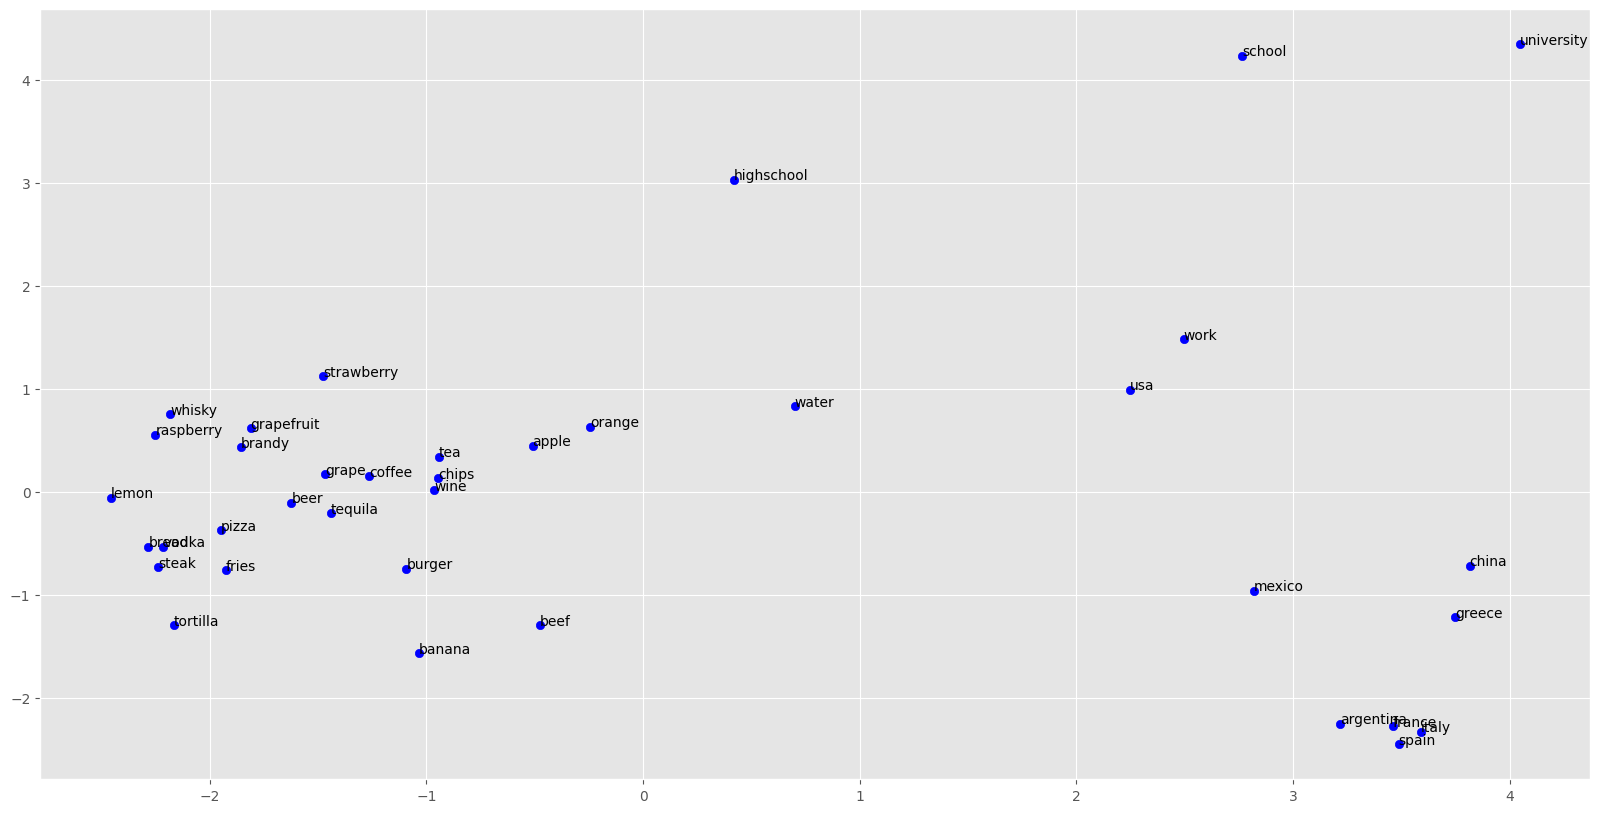

array([[ 0.36973   , -1.17970002, -0.92374998, ..., -0.54113001,
         0.21458   ,  0.81220001],
       [-0.80619001, -1.02450001, -0.28062001, ..., -0.47771001,
        -0.30274999,  0.012332  ],
       [-0.37436   , -0.11959   , -0.87608999, ..., -0.10138   ,
        -0.51134998, -0.18633001],
       ...,
       [ 0.51358998,  0.19695   , -0.51944   , ...,  0.046842  ,
        -0.62897003,  0.35725999],
       [-1.10819995,  1.29159999, -0.78750998, ...,  0.26267999,
        -0.54315001,  0.035944  ],
       [-0.94611001,  0.64415997, -0.30484   , ...,  0.092469  ,
         0.54044998, -0.28299001]])

In [ ]:
# Visualize word embeddings for the specified words using PCA dimensionality reduction.
plot_embeddings(words, emb_dim, embeddings_dict, PCA)

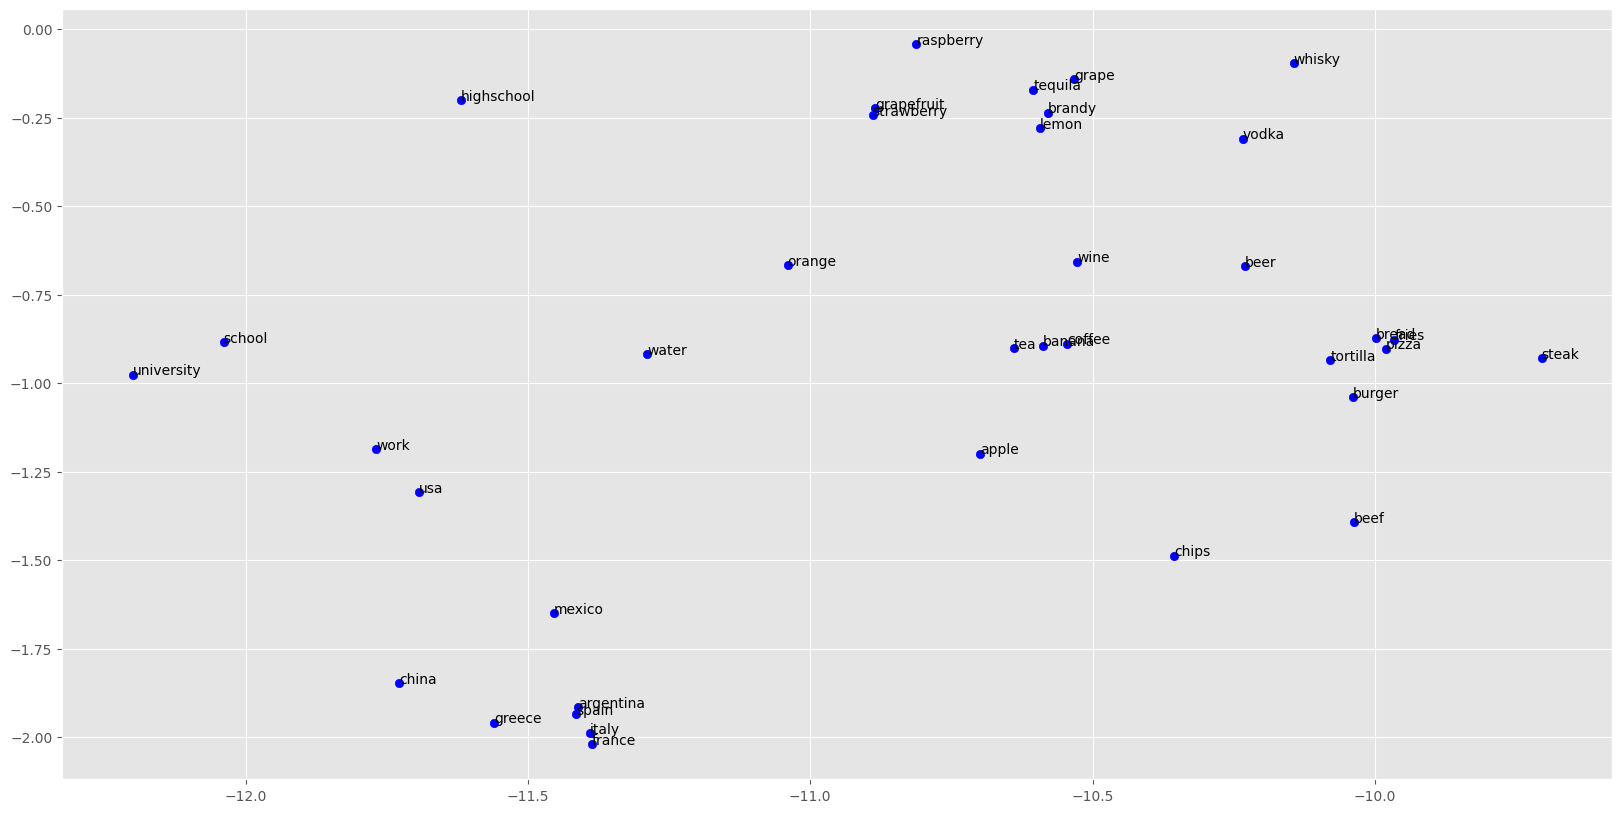

In [ ]:
# Visualize word embeddings for the specified words using t-SNE dimensionality reduction and store the resulting embeddings.
embeddings = plot_embeddings(words, emb_dim, embeddings_dict, TSNE)

### Let us compute analogies
The following code defines a function for performing word analogy tasks using word embeddings. This function helps find a word that shares a relationship with another word in the same way that a reference word is related to a target word. The function works as follows:

1. **Input Validation**:
   - The function takes four arguments: `word1`, `word2`, `word3`, and `embeddings_dict`.
   - It first checks whether any of the input words (`word1`, `word2`, `word3`) are missing in the `embeddings_dict`. If any of them is not found, it returns a message indicating that one or more words are not inside the embeddings dictionary.

2. **Word Vector Retrieval**:
   - The function retrieves the word vectors (embeddings) for the input words (`word1`, `word2`, `word3`) from the `embeddings_dict`. These word vectors represent words in a high-dimensional space.

3. **Analogy Vector Calculation**:
   - An "analogy vector" is calculated by:
     - Subtracting the vector of `word1` from the vector of `word2`.
     - Adding the vector of `word3` to the result.
     - This mathematical operation captures the relationship between the reference words (`word1` and `word2`) and the target word (`word3`).

4. **Search for the Best Analogy**:
   - The function initializes two variables, `closest_word` and `max_similarity`, to identify the word in the embeddings dictionary most similar to the calculated analogy vector.
   - It iterates through all words in the `embeddings_dict`, calculating the cosine similarity between each word's vector and the analogy vector.
   - The input words (`word1`, `word2`, `word3`) are excluded from this calculation.
   - If a word is found with a higher cosine similarity than the previous maximum (`max_similarity`), the function updates `max_similarity` and `closest_word` with the new values.

5. **Analogy Result**:
   - Finally, the function returns a formatted string that represents the word analogy result. It provides information about how `word1` is related to `word2` in the same way that `word3` is related to the `closest_word`.

In [ ]:
# Define a function for word analogy.
def analogy(word1, word2, word3, embeddings_dict):
    # Check if any of the input words are not present in the embeddings dictionary.
    if word1 not in embeddings_dict or word2 not in embeddings_dict or word3 not in embeddings_dict:
        return "One or more words passed are not inside embeddings dictionary."

    # Retrieve the word vectors for the input words.
    word1_vector = embeddings_dict[word1]
    word2_vector = embeddings_dict[word2]
    word3_vector = embeddings_dict[word3]

    # Calculate the analogy vector by subtracting 'word1_vector' from 'word2_vector' and adding 'word3_vector'.
    # This is a common method for finding analogies in word vector spaces, where it captures relationships; "king - man + woman = queen."
    analogy_vector = word2_vector - word1_vector + word3_vector

    # Initialize variables to find the word most similar to the 'analogy_vector'.
    closest_word = None  # Variable to store the word most similar to the analogy.
    max_similarity = -1.0  # Variable to store the maximum cosine similarity found.

    # Iterate through the words in the embeddings dictionary to find the most similar word.
    for word, vector in embeddings_dict.items():
        # Skip the input words in the calculation.
        if word not in [word1, word2, word3]:
            # Calculate the cosine similarity between 'vector' and 'analogy_vector'.
            similarity = np.dot(vector, analogy_vector) / (np.linalg.norm(vector) * np.linalg.norm(analogy_vector))

            # Update the closest word and maximum similarity if a better match is found.
            if similarity > max_similarity:
              max_similarity = similarity  # Update the maximum similarity found.
              closest_word = word  # Update the word most similar to the analogy.

    # Return the word analogy result as a string.
    return f'{word1} is to {word2} as {word3} is to {closest_word}'

In [ ]:
# Find an analogy: 'man' is to 'king' as 'woman' is to...
result = analogy('man', 'king', 'woman', embeddings_dict)
# Print the result
print(result)

man is to king as woman is to queen


#### find_most_similar Function

The `find_most_similar` function is designed to identify words that are semantically similar to a given word within a dictionary of word embeddings. It uses cosine similarity as a measure of semantic proximity. Here's an overview of the function's operation:

- **Input Validation**:
   - The function accepts three parameters: `word`, `embeddings_dict`, and an optional `top_n` parameter to specify the number of most similar words to retrieve.
   - It performs an initial check to confirm whether the provided `word` exists within the `embeddings_dict`, a dictionary containing word embeddings. If the word is not found, the function returns a message indicating its absence in the embeddings dictionary.

- **Similarity Calculation**:
   - The function obtains the vector representation of the input `word` from the `embeddings_dict`, which serves as a high-dimensional representation.
   - A dictionary, `similarities`, is created to store the computed similarities between the input `word` and all other words in the embeddings dictionary.
   - A loop is used to iterate through all the words within the `embeddings_dict`. It calculates the cosine similarity between the vector of the input `word` and the vectors of other words using the dot product and respective norms.
   - These similarity values are recorded within the `similarities` dictionary.

- **Top Similar Words**:
   - Following similarity calculation, the function determines the top `top_n` most similar words by sorting the `similarities` dictionary in descending order based on similarity values. These words are considered to be the most semantically akin to the input `word`.

- **Result**:
   - The function returns a list containing the most similar words, along with their respective similarity values. This list supplies insight into the semantic relatedness of each word to the input `word,' as measured by cosine similarity.


In [ ]:
# Define a function to find the most similar words to a given word in the embeddings dictionary.
def find_most_similar(word, embeddings_dict, top_n=10):
    # Check if the given word is not present in the embeddings dictionary.
    if word not in embeddings_dict:
        return "The word is not in the embeddings dictionary."

    # Retrieve the vector representation of the given word.
    word_vector = embeddings_dict[word]

    # Initialize a dictionary to store word similarities.
    similarities = {}

    # Iterate through all words in the embeddings dictionary to calculate similarities.
    for other_word, other_vector in embeddings_dict.items():
        # Skip the same word in the calculation.
        if other_word != word:
            # Calculate the cosine similarity between the given word and other words.
            similarity = np.dot(word_vector, other_vector) / (np.linalg.norm(word_vector) * np.linalg.norm(other_vector))

            # Store the calculated similarity in the 'similarities' dictionary.
            similarities[other_word] = similarity

    # Find the top 'top_n' most similar words based on cosine similarity.
    most_similar_words = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]

    # Return a list of the most similar words along with their similarities.
    return most_similar_words


In [ ]:
# Find the most similar words to 'water' using the 'find_most_similar' function.
most_similar = find_most_similar('water',embeddings_dict)

In [ ]:
# Iterate through the most similar words and print them along with their rank.
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0]}')

1 ---> dry
2 ---> natural
3 ---> sand
4 ---> waste
5 ---> drinking
6 ---> clean
7 ---> ocean
8 ---> soil
9 ---> sewage
10 ---> seawater
